## **MUGHEERA SALEEM**
# **361466 (PLANT VILLAGE DATASET TESTING)**

In [1]:
pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 992.2/992.2 KB 21.2 MB/s eta 0:00:00


# **All package Imports**

In [2]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import cv2 
import matplotlib.pyplot as plt
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd
import os
import sys
import visualkeras
import time
from sklearn.metrics import confusion_matrix, classification_report

# **Mounting Drive**

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# **Trained Model Path**

In [4]:
PATH = "/content/drive/MyDrive/DL Trained Models/Plant_model"

# **Loading Dataset**

In [5]:
file_path = f"{getcwd()}/data"

(train_set, valid_set, test_set),info = tfds.load('plant_village',split=['train[:70%]','train[70%:90%]','train[90%:]'],with_info=True,as_supervised=True,data_dir=file_path)

get_label_name = info.features['label'].int2str

m_train = len(train_set)
print(m_train)

m_valid = len(valid_set)
print(m_valid)

m_test = len(test_set)
print(m_test)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/54303 [00:00<?, ? examples/s]

Shuffling /content/data/plant_village/1.0.2.incompleteJ1G04N/plant_village-train.tfrecord*...:   0%|          …

Dataset plant_village downloaded and prepared to /content/data/plant_village/1.0.2. Subsequent calls will reuse this data.
38012
10861
5430


# **Loading Trained model from G_drive**

In [6]:
new_model = tf.keras.models.load_model(PATH)

# **Model Summary**

In [7]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_94 (Conv2D)          (None, 100, 100, 8)       1184      
                                                                 
 batch_normalization_94 (Bat  (None, 100, 100, 8)      32        
 chNormalization)                                                
                                                                 
 conv2d_95 (Conv2D)          (None, 100, 100, 16)      6288      
                                                                 
 batch_normalization_95 (Bat  (None, 100, 100, 16)     64        
 chNormalization)                                                
                                                                 
 conv2d_96 (Conv2D)          (None, 100, 100, 32)      12832     
                                                                 
 batch_normalization_96 (Bat  (None, 100, 100, 32)     1

# **Model Architecture**

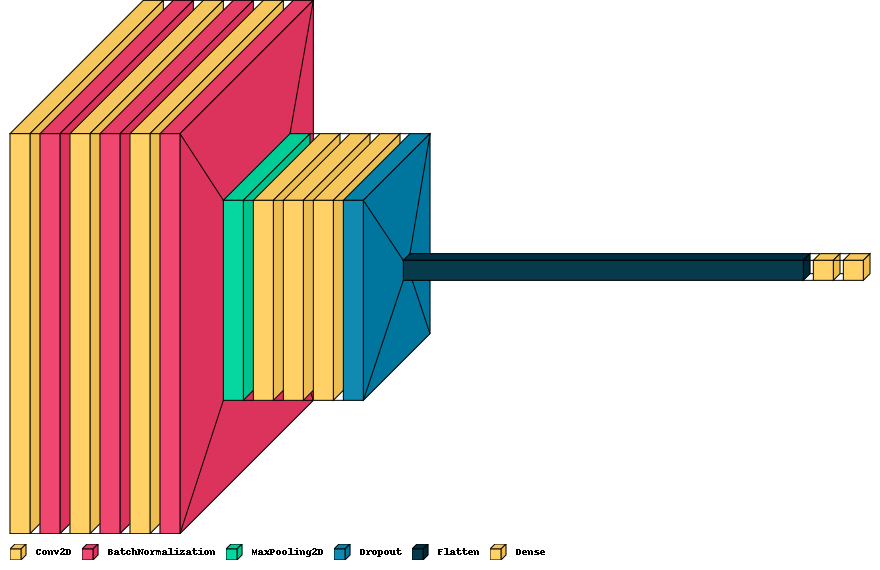

In [8]:
visualkeras.layered_view(new_model,legend=True)

# **Doing inference using trained model**

Label: 37
Original Label Name:  Tomato___Tomato_Yellow_Leaf_Curl_Virus
Label: 25
Original Label Name:  Squash___Powdery_mildew
Label: 24
Original Label Name:  Soybean___healthy
Label: 7
Original Label Name:  Corn___Cercospora_leaf_spot Gray_leaf_spot
Label: 1
Original Label Name:  Apple___Black_rot
Label: 37
Original Label Name:  Tomato___Tomato_Yellow_Leaf_Curl_Virus
1/1 [==============================] - 0s 331ms/step
Predicted label name:  37
1/1 [==============================] - 0s 81ms/step
Predicted label name:  25
1/1 [==============================] - 0s 81ms/step
Predicted label name:  24
1/1 [==============================] - 0s 86ms/step
Predicted label name:  7
1/1 [==============================] - 0s 88ms/step
Predicted label name:  4
1/1 [==============================] - 0s 80ms/step
Predicted label name:  37


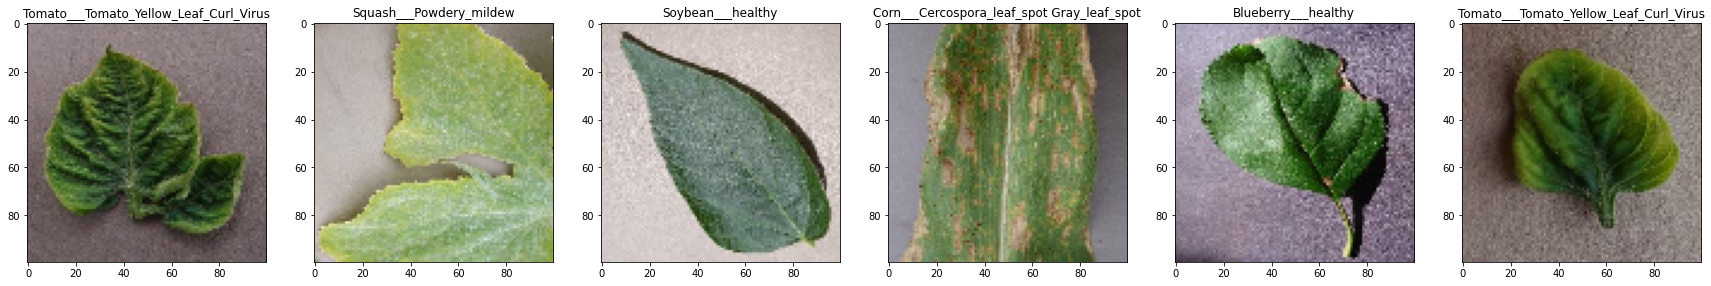

In [9]:
num_examples = 6
prediction_images = []
prediction_labels = []
ts = train_set.shuffle(1000)
fig = plt.figure(figsize=(num_examples*5,num_examples*5))

for img,label in ts.take(num_examples):
  img = np.asarray(img)/255.0
  img = cv2.resize(img,(100,100))
  prediction_images.append(img)
  prediction_labels.append(label)
  print("Label: {}".format(label))
  print('Original Label Name: ',get_label_name(label))

for i in range (1,num_examples+1):
  img = prediction_images[i-1] 
  fig.add_subplot(1,num_examples,i)
  plt.imshow(img)
  input_arr = tf.keras.preprocessing.image.img_to_array(img)
  input_arr = np.array([input_arr])  # Convert single image to a batch.
  prediction = new_model.predict(input_arr)
  p_list = prediction[0].tolist()
  max_prob = max(p_list)
  label = p_list.index(max_prob)
  print('Predicted label name: ',label)
  plt.title(get_label_name(label))

In [10]:
x_test = []
y_test = []

for image,label in test_set.take(-1):
  image = np.asarray(image)
  img = cv2.resize(image,(100,100))/255.0
  x_test.append(img)
  y_test.append(label)

x_test = np.asarray(x_test)
y_test = np.asarray(y_test)

In [11]:
loss, acc = new_model.evaluate(x_test, y_test, verbose=1)
print('> %.3f' % (acc * 100.0))
print('> %.3f' %loss)

170/170 [==============================] - 298s 2s/step - loss: 0.2317 - accuracy: 0.9278
> 92.781
> 0.232


In [12]:
print('Final accuracy on Test Data is: %.3f' % (acc * 100.0))
print('Final loss on Test Data is: %.3f' %loss)

Final accuracy on Test Data is: 92.781
Final loss on Test Data is: 0.232


In [15]:
y_prediction = new_model.predict(x_test)
#Create confusion matrix and normalizes it over predicted (columns)
y_pred=np.argmax(y_prediction,axis=1)
print(classification_report(y_pred,y_test))
confusion_matrix(y_pred,y_test)

170/170 [==============================] - 306s 2s/step


array([[ 50,   1,   0, ...,   0,   0,   0],
       [  0,  57,   0, ...,   0,   0,   0],
       [  0,   0,  21, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 124,   3,   0],
       [  0,   0,   0, ...,   0,  27,   0],
       [  0,   0,   0, ...,   0,   1, 538]])

In [17]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85        59
           1       0.88      0.98      0.93        58
           2       0.84      0.91      0.87        23
           3       0.91      0.97      0.94       150
           4       0.98      0.92      0.95       141
           5       0.88      0.98      0.92        81
           6       0.99      0.88      0.93       112
           7       0.70      0.83      0.76        47
           8       0.99      0.99      0.99       127
           9       1.00      1.00      1.00       112
          10       0.84      0.95      0.89        99
          11       0.89      0.92      0.90       109
          12       0.98      0.95      0.96       130
          13       0.92      0.85      0.88        39
          14       1.00      0.95      0.98       110
          15       0.98      0.98      0.98       561
          16       0.92      0.95      0.94       230
          17       0.96    